In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

Let's see how our [machine Learning](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx), [project planning](https://www.kamwithk.com/insight-is-king-how-to-get-it-and-avoid-pitfalls-ckbjfohz201ujzqs1lwu5l7xd) and [essential coding tools](https://www.kamwithk.com/the-complete-coding-practitioners-handbook-ck9u1vmgv03kg7bs1e5zwit2z) can be brought to life in a real-world project!
Today we're going through how we can predict how much energy we use daily using temperature data.
We previously imported and cleaning our data, so will now **graph and depict the story behind our energy usage**!.

This is the second part of three ([first here](https://www.kamwithk.com/machine-learning-energy-demand-prediction-project-part-1-data-cleaning-ckc5nni0j00edkss13rgm75h4)). Feel free to code along, the full project is on [GitHub](https://github.com/KamWithK/Temp2Enrgy).


# The story
We wake up in the mornings, turn on the heater/air conditioner, find some yogurt from the fridge for breakfast, shave, turn on a computer, get the music rolling and finally get to work.
These tasks all have one thing in common - they use power!
Our heavy reliance on electricity makes it crucial to estimate how much energy we'll need to generate each day.

We [already found, imported and cleaned our data](https://www.kamwithk.com/machine-learning-energy-demand-prediction-project-part-1-data-cleaning-ckc5nni0j00edkss13rgm75h4) (good work guys), so we can move onto telling a story about our power usage.
But, fear not if this seems challenging.
We will take it one step at a time.
At each stage linking back to how it relates to our [ML field guide](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx).


We start with the [difficult but neccessary](https://www.kamwithk.com/insight-is-king-how-to-get-it-and-avoid-pitfalls-ckbjfohz201ujzqs1lwu5l7xd) task of interpreting our data.
Our first thought is to plot the whole time series at once, but damn a graph with 4 features, each with around five measurement every 30 minutes over 20 years isn't pretty, meaningful or fast to graph.
After banging our head against a brick wall for a while, we, of course, realise that we can plot specific features and relationships instead of *everything at once*.
With little to lose we start using simple summary statistics to find the maximum, minimum and average values.
These give us a rough overview of each column, but to push ourselves one step further we take a look at *how correlated our features are*.


Once we understand that temperature relates highly to energy demand (intuitive enough), we're ready to get going with some graphs 😉!
Although we can't graph *everything at once*, we still want to get a grasp of the overall picture - how our data changes with time.
We begin by identifying our problem - when we look for changes over 20 years, movement every 30 minutes is really meaningless and just blotches the picture.
Lucky for us our [field guide](https://www.kamwithk.com/machine-learning-field-guide-ckbbqt0iv025u5ks1a7kgjckx#chapter-3-visualisation) explains that we can plot each week's average value through *resampling*!
Now we know the general increasing and decreasing trends between states.

After looking at individual data for energy and temperature we move onto finding where the correlation between the two occurs.
The graphs for each state are different.
The states which had larger trends have more complex looking graphs.
This is complex and we don't have the data to account for these trends, so we'll need to remove them later on.

Now there's only one thing left for us - to find out how energy demand changes during a day and week.
Then... in no time, we've managed to depict the story of our energy usage through each envigorating day, month and year 😎.
At this point, we'd have successfully made it through the majority of our project!
After a brief celebration, we can move onto modelling... Let's not jump the gun though, this will be in the next (final) tutorial.

In [2]:
data = pd.read_pickle("../Data/Data.pickle")

# The Epochs
## Chapter 1 - Descriptive Statistics
Since we can't view everything at once, we want to get a rough gauge on what our data looks like.
The natural first step is to look at each column's mean, minimum and maximum value.
These are called descriptive statistics, and Pandas calculates them for us using the ```describe``` function.

Since we want to extend this to see what is related to energy demand (since we're trying to predict it later on), we'll find the *correlations*.
To find the correlations between features Pandas provides the ```corr``` function.

The stats show:
* ```TotalDemand``` has an average of 4619MW with a minimum of 22 mW and a maximum of 14580 MW.
* ```WetBulbTemperature``` ranges from a minimum of -9.0°C to a maximum of 41°C.
* ```TotalDemand``` is most correlated to ```WetBulbTemperature```

Although the correlation function only accounts for linear relationships (straight lines), it is still useful in knowing which features are worth graphing and including in our model.
Here primarily ```WetBulbTemperature```, but ```StationPressure``` may also be useful.

In [3]:
data.describe()

,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure
count,1.656254e+06,1.656254e+06,1.656254e+06,1.656254e+06,1.656254e+06
mean,4.619521e+03,5.143376e+01,1.346589e+01,1.016535e+03,1.012486e+03
std,2.848791e+03,1.910091e+02,4.668981e+00,7.543408e+00,7.798352e+00
min,2.189000e+01,-1.000000e+03,-9.000000e-01,9.772000e+02,9.693000e+02
25%,1.413990e+03,2.336000e+01,9.900000e+00,1.011900e+03,1.007800e+03
50%,5.131249e+03,3.443000e+01,1.310000e+01,1.016800e+03,1.013100e+03
75%,6.591798e+03,5.490000e+01,1.700000e+01,1.021600e+03,1.017900e+03
max,1.457986e+04,1.470000e+04,4.100000e+01,1.041800e+03,1.037600e+03


In [4]:
data.corr()

,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure
TotalDemand,1.000000,0.014473,0.357300,0.044859,0.188955
RRP,0.014473,1.000000,0.032914,-0.019025,-0.017678
WetBulbTemperature,0.357300,0.032914,1.000000,-0.249321,-0.125920
SeaPressure,0.044859,-0.019025,-0.249321,1.000000,0.887758
StationPressure,0.188955,-0.017678,-0.125920,0.887758,1.000000


# Chapter 2 - Finding Long-Term Trends
## Energy over 20 Years
We want to know the story of how we use energy.
There's one simple way to do that - graphs 🤓.
We can start by looking at what happens on a large scale, and then slowly zoom in.

We'll view each state separately, since their trends may not be the same.

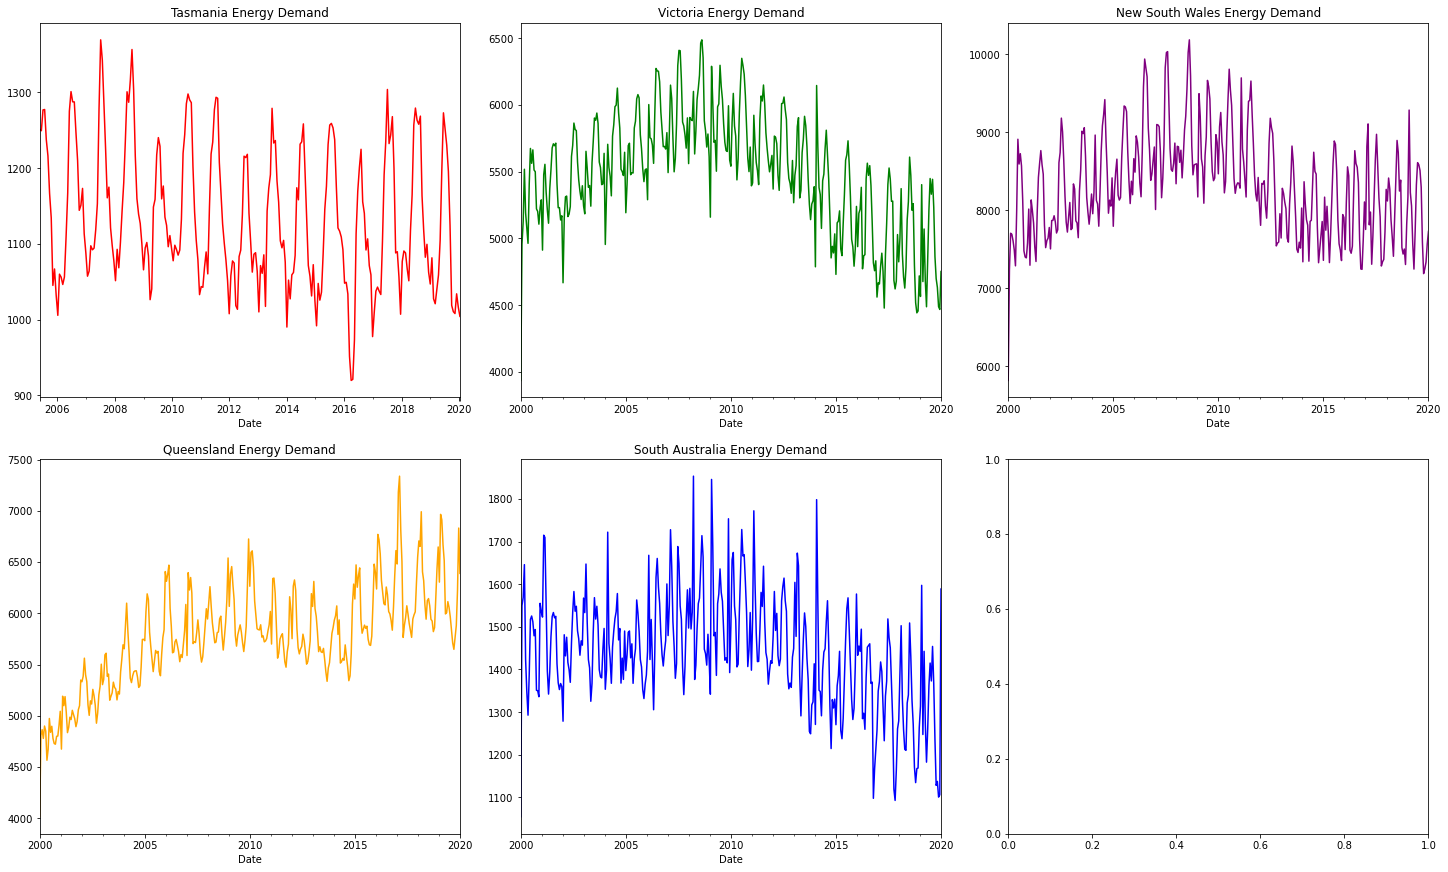

In [5]:
fig, axes  = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("3W").mean()["TotalDemand"]["TAS"].plot(color="red", title="Tasmania Energy Demand", ax=axes[0,0]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["VIC"].plot(color="green", title="Victoria Energy Demand", ax=axes[0,1]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["NSW"].plot(color="purple", title="New South Wales Energy Demand", ax=axes[0,2]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["QLD"].plot(color="orange", title="Queensland Energy Demand", ax=axes[1,0]);
data.groupby("Region").resample("3W").mean()["TotalDemand"]["SA"].plot(color="blue", title="South Australia Energy Demand", ax=axes[1,1]);

It can still be difficult to interpret graphs after they're resampled.
So let's take it slowly, one step at a time.


The first noticeable pattern is that energy always fluctuates between a high and low point.
The high and low points aren't always the same.
* Tasmania and South Australia range from around 900 to 1400
* Victoria from 4500 to 6500
* New South Wales from 6000 to 10000
* Queensland from 4500 to 7500

We can tell though that the trends aren't constant.
There can be a rapid increase in energy usage (Queensland until ~2010), a steep fall (Victoria after ~2010) or even continuous stability (Tasmania)!
The patterns are clearly not regular or caused directly by temperature (and so not predictable using historic temperature and energy data).


Although we don't have data on these trends, we can give an educated guess on what causes them.
We know that the population isn't stable, and grows at different rates for different states.
There also been a massive increase in technologies power efficiency, and economic conditions affect peoples willingness to use power.
On top of this, global warming pushes more and more people to install solar panels (which produce power which isn't accounted for).
Since we don't have data on any of these features, we'll try to remove the trends before we begin our modelling.

## Energy over Single Years
Let's now zoom in!
We'll look at trends which occur during a single year.
Since we're graphing 5 years instead of 20 we'll, of course, *need less resampling*.

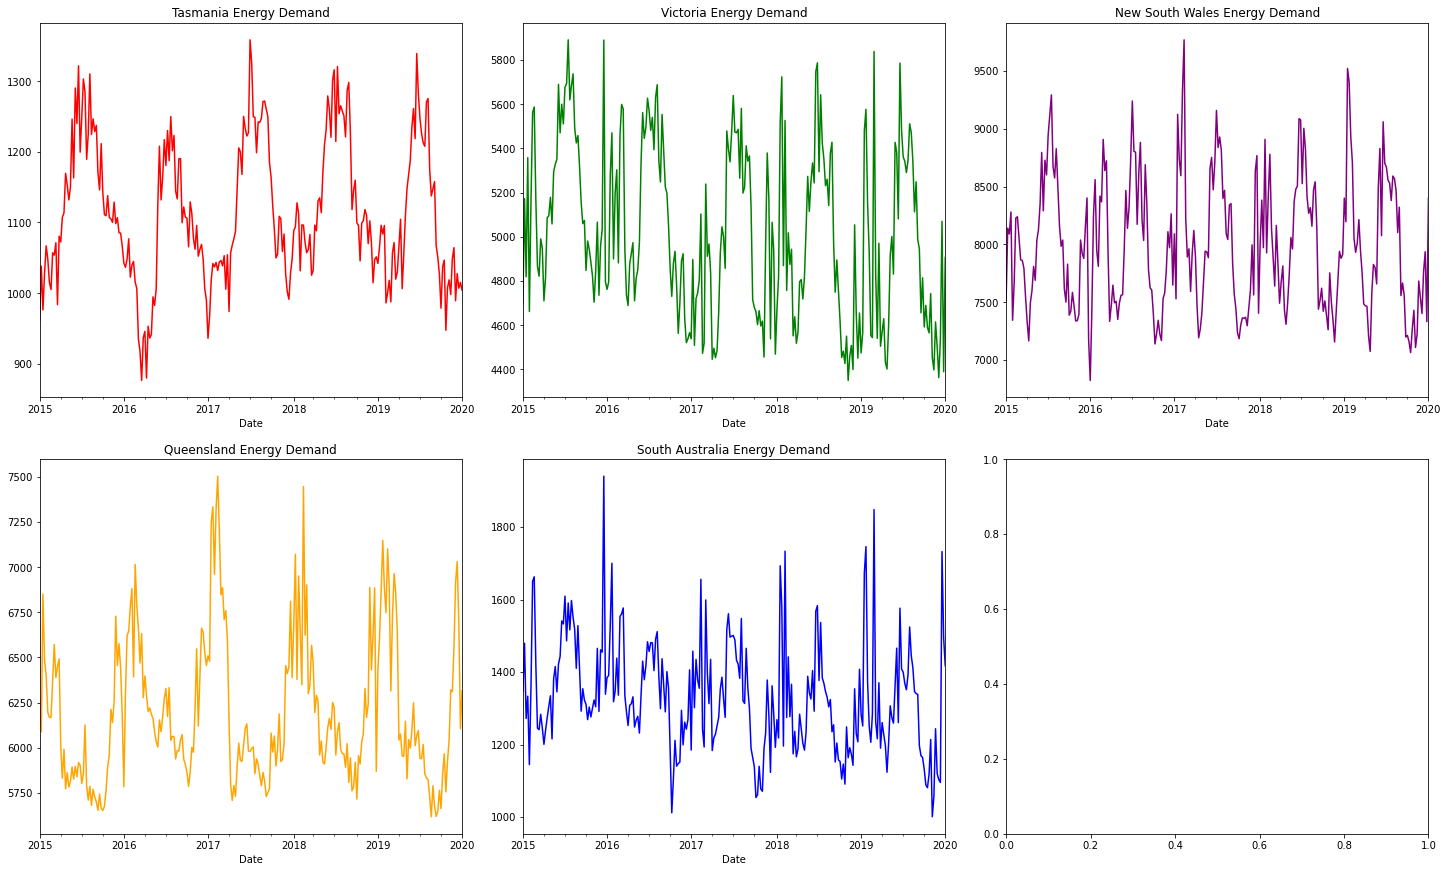

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").resample("W").mean()["TotalDemand"]["TAS"]["2015":"2020"].plot(color="red", title="Tasmania Energy Demand", ax=axes[0,0]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["VIC"]["2015":"2020"].plot(color="green", title="Victoria Energy Demand", ax=axes[0,1]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["NSW"]["2015":"2020"].plot(color="purple", title="New South Wales Energy Demand", ax=axes[0,2]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["QLD"]["2015":"2020"].plot(color="orange", title="Queensland Energy Demand", ax=axes[1,0]);
data.groupby("Region").resample("W").mean()["TotalDemand"]["SA"]["2015":"2020"].plot(color="blue", title="South Australia Energy Demand", ax=axes[1,1]);

We can tell that the energy demand is usually lowest in spring and autumn, whilst highest during winter and/or summer.
Tasmania tends to have a higher demand in winter than summer.
Victoria's similar, but with more frequent peaks in energy demand during summer.
On the other hand, Queensland uses the most energy during summer.
New South Wales and South Australia are both have max energy in summer and winter!

Tasmania is consistently cooler (being the small island) unlike hot and sweaty New South Wales and South Australia.
This would explain the relative differences in where max's/min's occur.

## Temperature over 20 Years
Temperature is just as important as energy though.
So we'll take a look at it as well!

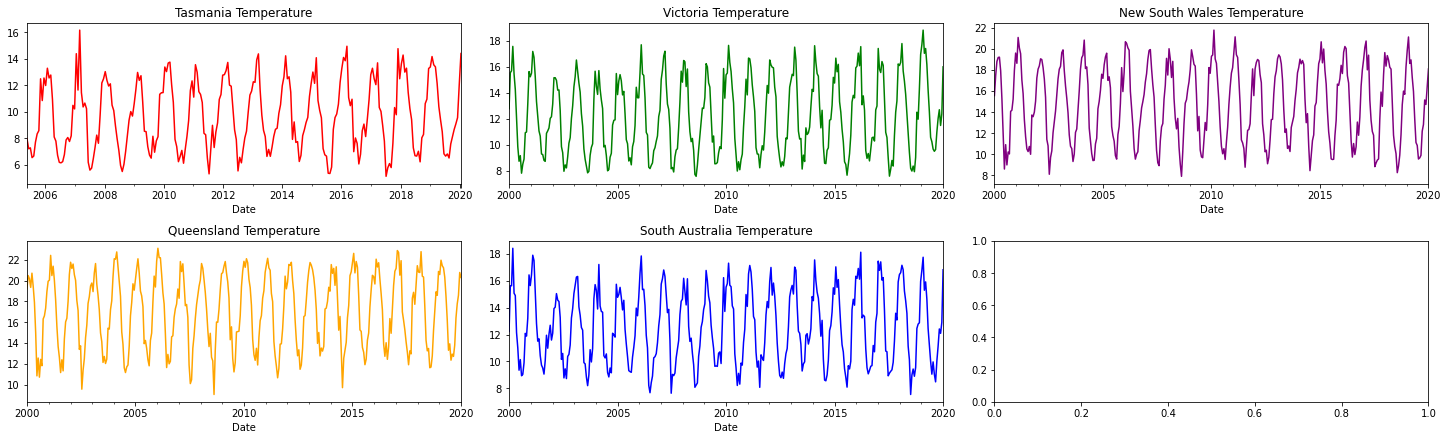

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6), constrained_layout=True)

data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["TAS"].plot(color= "red", title="Tasmania Temperature", ax=axes[0,0]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["VIC"].plot(color= "green", title="Victoria Temperature", ax=axes[0,1]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["NSW"].plot(color= "purple", title="New South Wales Temperature", ax=axes[0,2]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["QLD"].plot(color= "orange", title="Queensland Temperature", ax=axes[1,0]);
data.groupby("Region").resample("3W").mean()["WetBulbTemperature"]["SA"].plot(color="blue", title="South Australia Temperature", ax=axes[1,1]);

Unlike the energy graphs, the temperature graphs don't have any large immediately noticeable trends.
However, we can see that the temperature varies from a minimum of around 8° to a maximum of around 22°.
Although this plot doesn't show any significant variations of temperature between states, they do exist.
Tasmania is consistantly cooler (being the small island) unlike hot and sweaty New South Wales and South Australia.

## Temperature and Energy Correlations
We know temperature and energy are highly correlated, but we don't yet know how.
Well, lets find out!

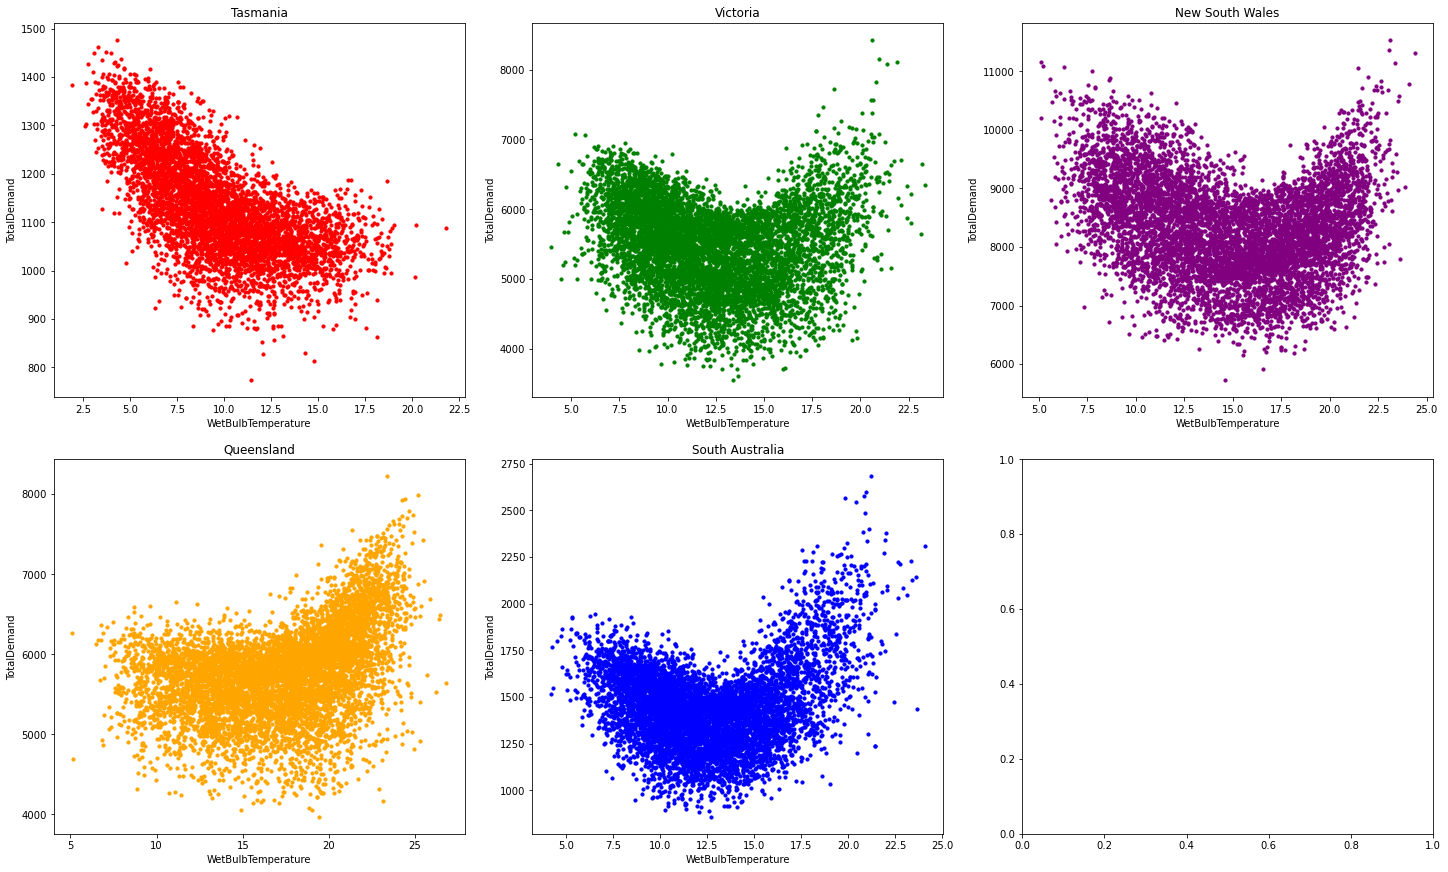

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), constrained_layout=True)

data.groupby("Region").get_group("TAS").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "red", ax=axes[0,0], title="Tasmania");
data.groupby("Region").get_group("VIC").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "green", ax=axes[0,1], title="Victoria");
data.groupby("Region").get_group("NSW").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "purple", ax=axes[0,2], title="New South Wales");
data.groupby("Region").get_group("QLD").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "orange", ax=axes[1,0], title="Queensland");
data.groupby("Region").get_group("SA").resample("D").mean().plot(kind="scatter",x="WetBulbTemperature", y="TotalDemand", s=10, color= "blue", ax=axes[1,1], title="South Australia");

These charts show us one major thing, that the greater the trend, the more confusing (and complicated) the relationship between temperature and energy demand becomes.
This is why the graph of temperature vs energy demand for Tasmania is almost a straight line (albeit a thick one), whereas the rest curved.
In other words, the greater the trend, the wider and thicker the curve!

Since we don't have any population or economic data, the trend must be removed (in the next tutorial).

## Chapter 3 - Analysing Small Timeframes
The graphs below show the comparison of energy demand between regions for a single day and a week during winter and summer.
We can start with a week (11/06/2017 to 17/06/2017 here) to see how energy demand fluctuates during the week.
We're *only testing one small timeframe*, this is for brevity (the same patterns below can be seen elsewhere too).

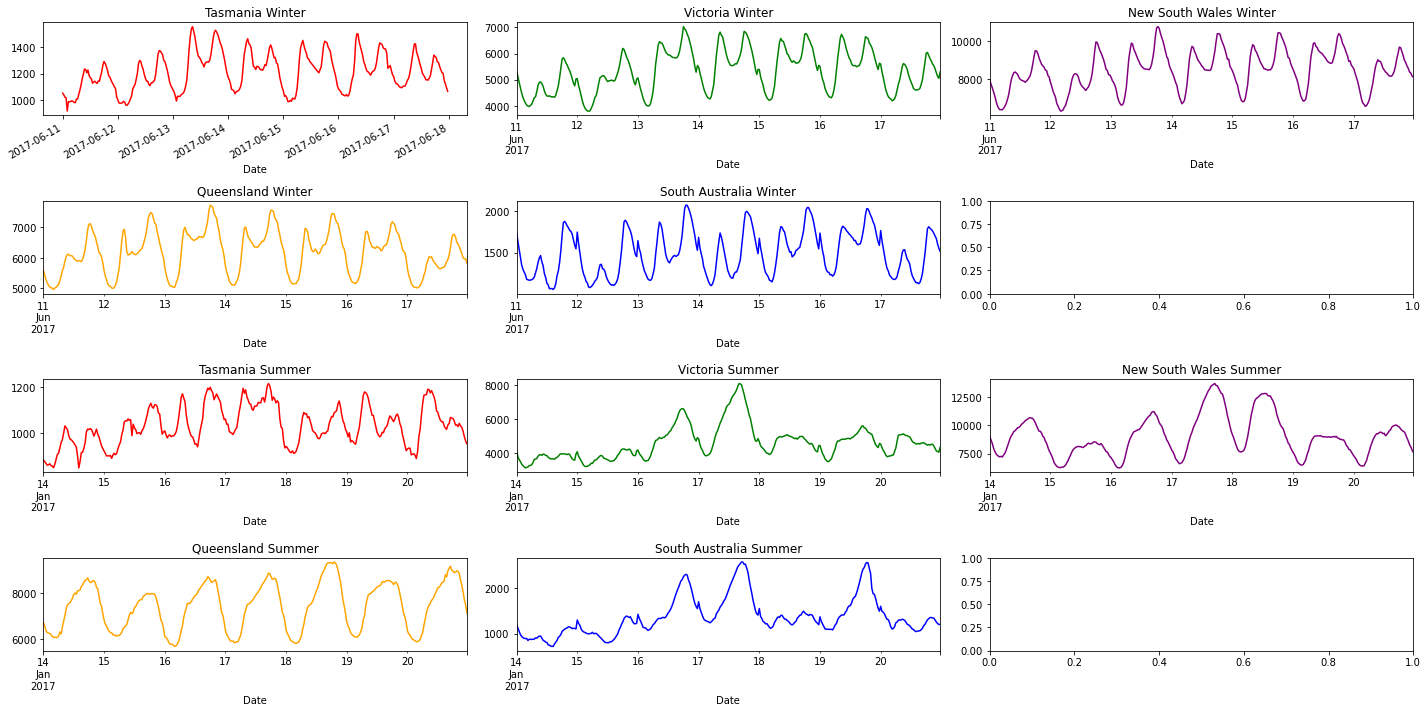

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10), tight_layout=True)

# Winter
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("TAS")["TotalDemand"].plot(color="red", title="Tasmania Winter", ax=axes[0,0]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("VIC")["TotalDemand"].plot(color="green", title="Victoria Winter", ax=axes[0,1]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("NSW")["TotalDemand"].plot(color="purple", title="New South Wales Winter", ax=axes[0,2]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("QLD")["TotalDemand"].plot(color="orange", title="Queensland Winter", ax=axes[1,0]);
data["2017-06-11":"2017-06-17"].groupby("Region").get_group("SA")["TotalDemand"].plot(color="blue", title="South Australia Winter", ax=axes[1,1]);

# Summer
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("TAS")["TotalDemand"].plot(color="red", title="Tasmania Summer", ax=axes[2,0]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("VIC")["TotalDemand"].plot(color="green", title="Victoria Summer", ax=axes[2,1]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("NSW")["TotalDemand"].plot(color="purple", title="New South Wales Summer", ax=axes[2,2]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("QLD")["TotalDemand"].plot(color="orange", title="Queensland Summer", ax=axes[3,0]);
data["2017-1-14":"2017-1-20"].groupby("Region").get_group("SA")["TotalDemand"].plot(color="blue", title="South Australia Summer", ax=axes[3,1]);

All states energy usage daily tend to be just about the same.
There are two peaks in Summer and Winter.
The first one is smaller and during the day (5-9 am), whilst the second is larger and at night (4-7 pm).
These occur at times when people are most active in homes (before and after work).
Although only a few graphs can be shown here, these patterns do persist (swapping out different days will show this).

The energy demand across a week in summer tends to be similar to winter, but the demand increases far more throughout the week!

We can now move onto looking at a single day (11/06/2017 here).

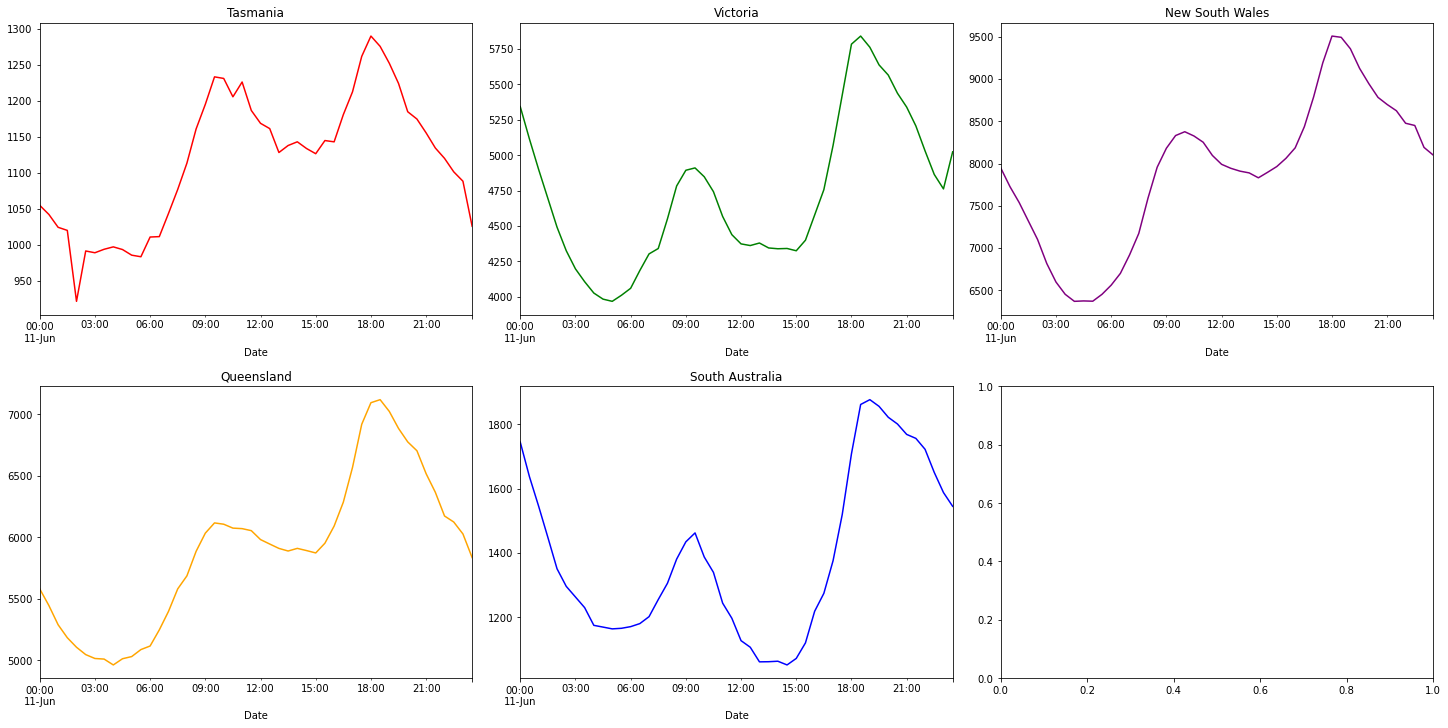

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), constrained_layout=True)

data["2017-06-11"].groupby("Region").get_group("TAS")["TotalDemand"].plot(title="Tasmania", ax=axes[0,0], color="red");
data["2017-06-11"].groupby("Region").get_group("VIC")["TotalDemand"].plot(title="Victoria", ax=axes[0,1], color="green");
data["2017-06-11"].groupby("Region").get_group("NSW")["TotalDemand"].plot(title="New South Wales", ax=axes[0,2], color="purple");
data["2017-06-11"].groupby("Region").get_group("QLD")["TotalDemand"].plot(title="Queensland", ax=axes[1,0], color="orange");
data["2017-06-11"].groupby("Region").get_group("SA")["TotalDemand"].plot(title="South Australia", ax=axes[1,1], color="blue");

From these charts, we can see that energy usage ramps up from 6 am to 9 am and again from 3 pm to 6 pm.
At 12 am to 3 pm our energy usage remains stable.
It typically drops after the start and end of the day (likely when most people are asleep).
The demand for summer and winter days are mostly similar.